In [251]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomNormal

## Armo del modelo

![](http://blog.otoro.net/assets/20160325/cppn_schematic.svg)

In [279]:
z_dim = 8
xy_dim = 3
image_channels = 1

initializer = RandomNormal(mean=0.0, stddev=1.0, seed=None)

model = Sequential()
model.add( Dense(32, activation="tanh", kernel_initializer=initializer, use_bias=False, input_shape=(z_dim+xy_dim,) ) )

for i in range(3):
    model.add( Dense(32, activation="tanh", kernel_initializer=initializer, use_bias=False ) )

model.add( Dense(image_channels, activation="sigmoid" ) )
    

In [213]:
z_sample = np.random.normal( size=(z_dim,) )
z_sample

array([ 0.2313994 , -2.17749561,  1.05054853,  0.12199131,  0.05368514,
       -0.39826857, -1.3288268 , -0.35169376, -1.62931984, -2.04050653,
       -0.5487439 ,  1.02022321, -0.97306027, -0.31752   , -1.48742038,
        0.95553869, -1.10766339,  0.95857625,  0.37066538, -0.27309339,
        2.16580015,  0.01137916, -0.95190274, -1.76103945,  0.06943617,
        1.6691971 ,  1.74188254,  0.17452154,  1.05965663,  0.3637996 ,
        0.97698859,  0.06296074])

In [315]:
image_width = 200
image_height = 200

In [233]:
z_sample = np.random.normal( size=(z_dim,) )

oneInput = np.hstack( (z_sample, [0,0,0]) )
display(oneInput.shape)
display(oneInput)
model.predict(oneInput.reshape((1,11)))

(11,)

array([-0.30496374, -0.4593094 ,  2.28915337, -0.40179156,  0.69109461,
        0.50622833, -0.4018878 , -0.95102314,  0.        ,  0.        ,
        0.        ])

array([[0.49970627]], dtype=float32)

In [234]:
# z_sample = np.random.normal( size=(z_dim,) )
z_sample = np.random.uniform(-1.0, 1.0, size=(z_dim,) )
scale = 10.0

allInputs = []



# scale * ( np.arange(x_dim) - (x_dim-1) / 2.0 ) /(x_dim-1)/0.5

for x in range(image_width):
    for y in range(image_height):
        sX = scale * ( x - (image_width-1)/2.0 ) / (image_width-1)/0.5
        sY = scale * ( y - (image_height-1)/2.0 ) / (image_height-1)/0.5
        c = np.sqrt( sX**2+sY**2 )
        
        oneInput = np.hstack( (z_sample, [sX,sY,c]) )
        allInputs.append( oneInput )

allInputs = np.array(allInputs)
display(allInputs.shape)
display(allInputs)

(2500, 11)

array([[  0.72471704,  -0.04787014,   0.50957959, ..., -10.        ,
        -10.        ,  14.14213562],
       [  0.72471704,  -0.04787014,   0.50957959, ..., -10.        ,
         -9.59183673,  13.85652669],
       [  0.72471704,  -0.04787014,   0.50957959, ..., -10.        ,
         -9.18367347,  13.57718153],
       ...,
       [  0.72471704,  -0.04787014,   0.50957959, ...,  10.        ,
          9.18367347,  13.57718153],
       [  0.72471704,  -0.04787014,   0.50957959, ...,  10.        ,
          9.59183673,  13.85652669],
       [  0.72471704,  -0.04787014,   0.50957959, ...,  10.        ,
         10.        ,  14.14213562]])

In [235]:
np.mean(allInputs[:,8])

3.637978807091713e-16

In [310]:
newImage = model.predict(allInputs)

if image_channels == 1 :
    newImage = newImage.reshape( ( image_width, image_height ) )
else:
    newImage = newImage.reshape( ( image_width, image_height, image_channels ) )

display(newImage.shape)
plt.figure(figsize = (5,5))
plt.imshow(newImage, cmap="Greys")
plt.axis("off")
plt.tight_layout()

ValueError: cannot reshape array of size 2500 into shape (500,500)

array([-0.68985989, -0.53624159,  0.90503545, -0.17711426, -0.05709935,
       -0.65926008, -0.02687148, -0.53424195])

(200, 200)

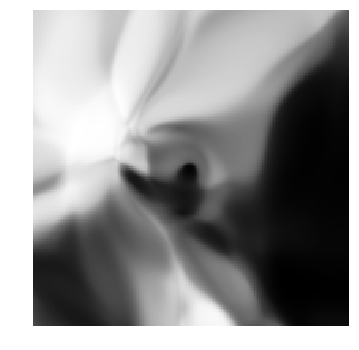

In [322]:
z_sample = np.random.uniform(-1.0, 1.0, size=(z_dim,) )
display(z_sample)
scale = 1.0

allInputs = []

for x in range(image_width):
    for y in range(image_height):
        sX = scale * ( x - (image_width-1)/2.0 ) / (image_width-1)/0.5
        sY = scale * ( y - (image_height-1)/2.0 ) / (image_height-1)/0.5
        c = np.sqrt( sX**2+sY**2 ) * scale
        
        oneInput = np.hstack( (z_sample*scale, [sX,sY,c]) )
        allInputs.append( oneInput )

allInputs = np.array(allInputs)

newImage = model.predict(allInputs)

if image_channels == 1 :
    newImage = newImage.reshape( ( image_width, image_height ) )
else:
    newImage = newImage.reshape( ( image_width, image_height, image_channels ) )

display(newImage.shape)
plt.figure(figsize = (5,5))
plt.imshow(newImage, cmap="Greys")
plt.axis("off")
plt.tight_layout()

(array([ 52., 120., 204., 264., 328., 428., 480., 372., 184.,  68.]),
 array([ 1.84713608, 10.71338927, 19.57964246, 28.44589565, 37.31214885,
        46.17840204, 55.04465523, 63.91090842, 72.77716161, 81.6434148 ,
        90.50966799]),
 <a list of 10 Patch objects>)

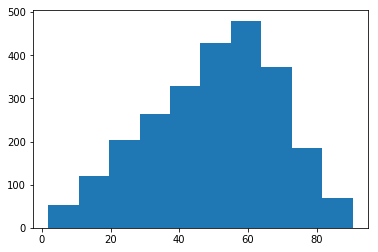

In [283]:
plt.hist(allInputs[:,10])